# **Coursework of Text as Data**

In this coursework, there are seven sections. A dataset of dialogs in movie is used to do clustering, classification and more. The last part is an review of a selected paper. The tool name convokit is used to operate dataset which is designed by Cornell group.

In [1]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [2]:
!pip3 install convokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.0/168.0 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for convokit: filename=convokit-2.5.3-py3-none-any.whl size=204125 sha256=8acb47cbbe8940236502835cb77de8e07259b30886dd0e3f11a1d27691aa1a69
  Stored in directory: /root/.cache/pip/wheels/2e/ef/38/9588c33dabed09f2a31ce3fbde7f6a6a1c19593c1ffd8d74aa
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171048 sha256=b32b3ace5c120befc1cec23c9e49e364747c1406eddb4e2ea1939541d6ff7b78
  St

## **Part 1 Dataset**


### **Glance of Data**

In [3]:
from convokit import Corpus, download
corpus = Corpus(filename=download("movie-corpus"))

In [4]:
corpus.get_speakers_dataframe().head()

,vectors,meta.character_name,meta.movie_idx,meta.movie_name,meta.gender,meta.credit_pos
id,,,,,,
u0,[],BIANCA,m0,10 things i hate about you,f,4
u2,[],CAMERON,m0,10 things i hate about you,m,3
u3,[],CHASTITY,m0,10 things i hate about you,?,?
u4,[],JOEY,m0,10 things i hate about you,m,6
u5,[],KAT,m0,10 things i hate about you,f,2


In [ ]:
corpus.get_utterances_dataframe().head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors
id,,,,,,,,
L1045,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[]
L1044,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[]
L985,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[]
L984,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[]
L925,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[]


In [ ]:
corpus.get_conversations_dataframe().head()

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
id,,,,,,,
L1044,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L984,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L924,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L870,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L866,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"


### **Questions and Answers (Data Preperation)**

(a) What is your dataset, 
and why did you select it? 
How might automatic classification/labelling of your dataset be
used in practice? [2 marks]

The dataset will be used in this coursework is 'Cornell Movie-Dialogs Corpus', a large collection of fictional conversations extracted from raw movie scripts. The size of this dataset can be seen:

In [5]:
corpus.print_summary_stats()

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


Since the conversation objects as samples that will be used in the trial are over 10000, 7000 conversation objects will be selected randomly.

In [6]:
conver_data = []
for i in range(6000):
  convs = corpus.random_conversation()
  conver_data.append(convs)
print(len(conver_data))

6000


This dataset was selected because of good struction of data, like documents can be conversations which are the combinations of utterance and there is a well-designed tool to process data, like using get_id function to search utterances of a converstaion, plus, my interest. In this dataset, sentences and information of dialog were collected as three objects: Speakers, Utterances, Conversations. Each kind of objects maintains a column named 'meta-data' (shown in dataframes above). The relationship among three objects are like this:

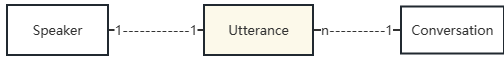

The idea is to classify genre of conversations using uttrances and genre.

(b) Provide a summary of the labels and input text to be used. 
What labels are to be predicted? Did you need to do
any preprocessing to create the labels or to make sure the number of labels was > 3 and <= 10? 
What is the text that
will be used for classification? [4 marks]

For each conversation the genre is a string with shape of list, in the trial a multiclass classification will conduct, so the processes below extract the first item of the gerne list, just assuming the first one is the most correlated and suitable one.

There are totally 24 genres and only the ten most frequent ones are selected: most frequent ones:  ['drama', 'thriller', 'comedy', 'action', 'romance', 'crime', 'sci-fi', 'adventure', 'mystery', 'horror']. And the text that will be used to classify are utterances being inlcuded in a conversation, they are combined as a string text relating to one conversation's label. All processes including removing conversation with empty genre values are shown below:

In [7]:
import re
from collections import Counter
all_genre = []
all = []
pattern = '[a-zA-Z]+'
count = 1
for convs in conver_data:
  # print(convs)
  convs_genre = re.findall(pattern, convs.meta['genre'])
  for g in convs_genre:
    if g == 'fi':
      pass
    elif g == 'sci':
      all.append('sci-fi')
    else:
      all.append(g)
      if g not in all_genre:
        all_genre.append(g)
print(all_genre)
print("total genres count: ", len(all_genre))

counts = Counter(all).most_common(10)
print(counts)
most_ten_fre = [ counts[i][0] for i in range(10) ]
print("most frequent ones: ", most_ten_fre)

['romance', 'comedy', 'drama', 'mystery', 'thriller', 'crime', 'action', 'adventure', 'fantasy', 'horror', 'music', 'sport', 'film', 'noir', 'family', 'biography', 'documentary', 'short', 'history', 'war', 'western', 'animation', 'musical', 'adult']
total genres count:  24
[('drama', 3219), ('thriller', 2436), ('comedy', 1853), ('romance', 1513), ('action', 1464), ('crime', 1433), ('sci-fi', 1088), ('adventure', 1045), ('mystery', 1014), ('horror', 794)]
most frequent ones:  ['drama', 'thriller', 'comedy', 'romance', 'action', 'crime', 'sci-fi', 'adventure', 'mystery', 'horror']


In [8]:
from random import sample
# count = 0
labels, texts = [], []
# delete samples whose genre are not the ten most frequent ones
for con in conver_data:
  convs_genre = re.findall(pattern, con.meta['genre'])
  if len(convs_genre) != 0:
    genre = convs_genre[0]
    if genre == 'sci' or genre == 'fi':
      genre = 'sci-fi'
    if genre not in most_ten_fre:
      # conver_data.remove(con)
      pass
    else:
      # count += 1
      labels.append(genre)
      utters = list(con.iter_utterances()) 
      content = ""
      for utt in utters:  
        content += utt.text + '\n'
      texts.append(content)
      # con.add_meta('one_genre', genre)
      # con.meta['genre'] = genre
print("length of label-list: ", len(labels))
print("length of texts-list: ", len(texts))
print("one label example: ", labels[300])
print("one text example: ", texts[300])

length of label-list:  5445
length of texts-list:  5445
one label example:  horror
one text example:  All right, forget it.  Tony, you got anything we can put on his face?
It's the truth, I swear.



(c) Is the dataset already split into a training, validation and test set? 
If not, use a 60/20/20% split to create the
training, validation and test set. 
Provide a table with the label counts for each split of the dataset and comment on
the distribution across labels and across data splits. 
Be sure you use the same splits throughout the entire report.
[2 marks]

The process to split data:

In [9]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
texts_train, texts_val, labels_train, labels_val = train_test_split(texts_train, labels_train, test_size=0.25, random_state=42)

In [10]:
print("--------------size--")
print("texts_train: ", len(texts_train))
print("labels_train: ", len(labels_train))
print("texts_val: ", len(texts_val))
print("labels_val: ", len(labels_val))
print("texts_test", len(texts_test))
print("labels_test", len(labels_test))


--------------size--
texts_train:  3267
labels_train:  3267
texts_val:  1089
labels_val:  1089
texts_test 1089
labels_test 1089


## **Part 2 Clustering**

In this part, the conversations stored in texts list will be used to do clustering. First, tokenization is conducted with spacy tools to remove stop words, whitespace and puctuation, also, to calculate similarity (the replacement of distance for k-means algorithm) between two conversations, lemma is used as the root of words. And then sparse TF-IDF vectors will be obtained from these lemmas.


### Vector and Method Preparation

To calculate the sparse TF-IDF vectors, vocabulary of this corpus is needed: 

In [34]:
import spacy
def text_pipeline_spacy(conv_text):
  tokens = []
  nlp = spacy.load("en_core_web_sm")
  doc = nlp(conv_text)
  for token in doc:
    if not token.is_stop and not token.is_space and not token.is_punct:
      tokens.append(token.lemma_.lower())
  return tokens

In [12]:
stopword_text = """
A               CANNOT          INTO            OUR             THUS
ABOUT           CO              IS              OURS            TO
ABOVE           COULD           IT              OURSELVES       TOGETHER
ACROSS          DOWN            ITS             OUT             TOO
AFTER           DURING          ITSELF          OVER            TOWARD
AFTERWARDS      EACH            LAST            OWN             TOWARDS
AGAIN           EG              LATTER          PER             UNDER
AGAINST         EITHER          LATTERLY        PERHAPS         UNTIL
ALL             ELSE            LEAST           RATHER          UP
ALMOST          ELSEWHERE       LESS            SAME            UPON
ALONE           ENOUGH          LTD             SEEM            US
ALONG           ETC             MANY            SEEMED          VERY
ALREADY         EVEN            MAY             SEEMING         VIA
ALSO            EVER            ME              SEEMS           WAS
ALTHOUGH        EVERY           MEANWHILE       SEVERAL         WE
ALWAYS          EVERYONE        MIGHT           SHE             WELL
AMONG           EVERYTHING      MORE            SHOULD          WERE
AMONGST         EVERYWHERE      MOREOVER        SINCE           WHAT
AN              EXCEPT          MOST            SO              WHATEVER
AND             FEW             MOSTLY          SOME            WHEN
ANOTHER         FIRST           MUCH            SOMEHOW         WHENCE
ANY             FOR             MUST            SOMEONE         WHENEVER
ANYHOW          FORMER          MY              SOMETHING       WHERE
ANYONE          FORMERLY        MYSELF          SOMETIME        WHEREAFTER
ANYTHING        FROM            NAMELY          SOMETIMES       WHEREAS
ANYWHERE        FURTHER         NEITHER         SOMEWHERE       WHEREBY
ARE             HAD             NEVER           STILL           WHEREIN
AROUND          HAS             NEVERTHELESS    SUCH            WHEREUPON
AS              HAVE            NEXT            THAN            WHEREVER
AT              HE              NO              THAT            WHETHER
BE              HENCE           NOBODY          THE             WHITHER
BECAME          HER             NONE            THEIR           WHICH
BECAUSE         HERE            NOONE           THEM            WHILE
BECOME          HEREAFTER       NOR             THEMSELVES      WHO
BECOMES         HEREBY          NOT             THEN            WHOEVER
BECOMING        HEREIN          NOTHING         THENCE          WHOLE
BEEN            HEREUPON        NOW             THERE           WHOM
BEFORE          HERS            NOWHERE         THEREAFTER      WHOSE
BEFOREHAND      HERSELF         OF              THEREBY         WHY
BEHIND          HIM             OFF             THEREFORE       WILL
BEING           HIMSELF         OFTEN           THEREIN         WITH
BELOW           HIS             ON              THEREUPON       WITHIN
BESIDE          HOW             ONCE            THESE           WITHOUT
BESIDES         HOWEVER         ONE             THEY            WOULD
BETWEEN         I               ONLY            THIS            YET
BEYOND          IE              ONTO            THOSE           YOU
BOTH            IF              OR              THOUGH          YOUR
BUT             IN              OTHER           THROUGH         YOURS
BY              INC             OTHERS          THROUGHOUT      YOURSELF
CAN             INDEED          OTHERWISE       THRU            YOURSELVES
"""

stopwords = set( [ s.lower().strip() for s in stopword_text.strip().split() ] )

In [13]:
import string
# def tokenize_rulebased(text):

#   tokens = re.findall(pattern, text)
#   return tokens
def tokenize_rulebased(text):
  prev_c = ''
  tokens = []
  for c in text:
    # Ignore characters that are whitespace (e.g. spaces, tabs, etc)
    if not c in string.whitespace:
      if prev_c in string.whitespace:
        is_new_token = True
      elif c in string.ascii_letters and not prev_c in string.ascii_letters:
        is_new_token = True
      elif c in string.punctuation and not prev_c in string.punctuation:
        is_new_token = True
      elif c in string.digits and not prev_c in string.digits:
        is_new_token = True
      else: # This is continuation of a token
        is_new_token = False
      if is_new_token:
        tokens.append(c)
      else:
        tokens[-1] += c
    prev_c = c 
  return tokens

def simple_stem_with_morerules(tokens):
  stems = []
  for item in tokens:
    if item not in string.punctuation:
      if item.endswith("ing"):
        item = item[:-3]
      if item.endswith("ed"):
        item = item[:-2]
      if item.endswith("s") and len(item) > 3:
        item = item[:-1]
      stems.append(item)
    else:
      pass
  return stems

def lowercase_tokens(tokens):
  return [ token.lower() for token in tokens]

def remove_stopwords(tokens):
  new_token = []
  for token in tokens:
    if token not in stopwords:
      new_token.append(token)
  return new_token

def text_pipeline(text):
  tokens = tokenize_rulebased(text)
  stemmed = simple_stem_with_morerules(tokens)
  lowercased = lowercase_tokens(stemmed)
  nostopwords = remove_stopwords(lowercased)
  return nostopwords

In [14]:
def make_vocabulary(texts):
  unique_tokens = sorted(set( t for token_list in texts for t in token_list ))
  
  token_to_id = { v:i for i,v in enumerate(unique_tokens)}
  
  return token_to_id

In [ ]:
from tqdm import tqdm 
conva_token_all = []
example =   [
    "My favourite soft drink is Apple Tango, but I also love Irn Bru doesn't.",
    "Irn Bru is a great drink.",
  ]
for conva in tqdm(texts):
  #这时候每一个conva都是一长段的字符串
  token_list = text_pipeline_spacy(conva)
  #之后数据处理用的都是token，这里提前处理了
  conva_token_all.append(token_list)
vocabularies = make_vocabulary(conva_token_all)
# print(vocabularies)

In [35]:
from tqdm import tqdm 
conva_token_all = []
example =   [
    "My favourite soft drink is Apple Tango, but I also love Irn Bru doesn't.",
    "Irn Bru is a great drink.",
  ]
for conva in tqdm(texts):
  #这时候每一个conva都是一长段的字符串
  token_list = text_pipeline_spacy(conva)
  #之后数据处理用的都是token，这里提前处理了
  conva_token_all.append(token_list)
vocabularies = make_vocabulary(conva_token_all)
# print(vocabularies)

100%|██████████| 5445/5445 [51:10<00:00,  1.77it/s]


In [16]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=5d9dc05f6b6340f943cdc853210a1608d53bad7c662a590be09b51448844c4c7
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [63]:
def make_tf_sparse(tokens, vocab):
  counts = Counter(tokens)
  dic = {}
  for item in counts.keys():
    dic[vocab[item]] = counts[item]
  return dic

In [64]:
def doc_frequency(corpus):
  dic = {}
  for tokens in corpus:
    counts = Counter(tokens)
    for item in counts.keys():
      if item not in dic.keys() or len(dic.keys()) == 0:
        dic[item] = 1
      else:
        dic[item] += 1
  return dic

In [65]:
import math
def make_tfidf_sparse(tokens, vocab, doc_freq, N):
  sparse_vector = {}
  counts = Counter(tokens)
  for t,c in counts.items():
    tf = 1 + math.log10(c) if c > 0 else 0
    idf = math.log10(N / doc_freq[t])
    sparse_vector[vocab[t]] = tf*idf
      
  return sparse_vector

In [66]:
def normalize_sparse_vector(sv):
  d = math.sqrt( sum( val*val for index,val in sv.items() ) )
  norm_vector = { index:val/d for index,val in sv.items() }
  return norm_vector

In [67]:
doc_freq = doc_frequency(conva_token_all) 

In [68]:
cluster_texts = texts
cluster_labels = labels

In [71]:
N = len(texts)
sparse_tfidf_vec = [make_tfidf_sparse(tokens, vocabularies, doc_freq, N) for tokens in conva_token_all]
nor_vec = [normalize_sparse_vector(v) for v in sparse_tfidf_vec]
# for item in nor_vec:
#   if len(item.items()) == 0:
#     index = nor_vec.index(item)
#     nor_vec.remove(item)
    # cluster_labels.remove(cluster_labels[index])
    # cluster_texts.remove(cluster_texts[index])

In [72]:
print(len(texts))
print(len(nor_vec))

5390
5445


In [73]:
def sparse_dot_prod(sv1, sv2):
  dot_prod = 0
  indices = set(sv1).intersection(sv2)
  for i in indices:
    dot_prod += sv1.get(i,0) * sv2.get(i,0)
  return dot_prod


In [78]:
def sparse_cosine_similarity(sv1, sv2):
  # print(sv1, sv2)
  d1 = math.sqrt( sum( val*val for index,val in sv1.items() ) )
  d2 = math.sqrt( sum( val*val for index,val in sv2.items() ) )
  sim = 0
  if d1 == 0 or d2 == 0:
    return sim
  else:
    return sparse_dot_prod(sv1,sv2) / (d1*d2)

### K-means Implementation

In [75]:
import numpy
import random

In [30]:
def calculate_centroid(centroids, current_clusters, k):
  # if len(centroids == 0):
  #   centroids = random.sample(data_points, k)
  #   return centroids
  #base on similarity to find a new data point whose similarity 
  #is the closest one to mean value of similarities in this class
  # else:
    new_centroids = []
  # for cluster in current_clusters:
    for i in range(k):
      similarities = {}
      for data_point in current_clusters[i]:
        similarities[current_clusters[i].index(data_point)] = sparse_cosine_similarity(centroids[i], data_point)
      average = sum(similarities.values()) / len(similarities)
      #likeliest = max(candidate_tokens, key=lambda t:unigram_token_prob(t, unigram_counts, unigram_N))
      a = min(similarities.keys(), key=lambda x: (similarities[x] - average))
      # print(a, len(current_clusters[i]))
      new = current_clusters[i][a]
      new_centroids.append(new)
    return new_centroids

In [31]:
def assign_data_points(data_points, centroids):
  #here we use similarity between data_points and centroids
  assigned_clusters = [ [] for _ in range(len(centroids))]
  for item in data_points:
    max_sim = -math.inf
    center_index = 0
    for cent in centroids:
      similarity = sparse_cosine_similarity(item, cent)
      if similarity > max_sim:
        max_sim = similarity
        center_index = centroids.index(cent)
    #通过上面的for循环找到了similarity最大的，以及对应的center
    assigned_clusters[center_index].append(item)
  return assigned_clusters

In [ ]:
# def k_means(data_points, k):
#   if len(centroids == 0):
#     centroids = random.sample(data_points, k)
#   #assignment of data_points
#   cur_assigned_clusters = assign_data_points(data_points, centroids)
#   #calculate new centeroids
#   calculate_centroid
#   return result

In [32]:
def isConvergence(last_cen, cen, k):
  change = []
  for i in range(k):
    dis = sparse_cosine_similarity(last_cen[i], cen[i])
    change.append(dis)
  mean = sum(change) / k
  if mean < 2E-3:
    return True
  else:
    return False

In [ ]:
max_run = 2000
k = 5
data_points = nor_vec
last_centroids = None
centroids = []
result = None
# cur_assigned_clusters = []
for i in range(max_run):
  if len(centroids) == 0:
    centroids = random.sample(data_points, k)
  #assignment of data_points
  last_centroids = centroids
  cur_assigned_clusters = assign_data_points(data_points, centroids)
  #calculate new centeroids
  centroids = calculate_centroid(centroids, cur_assigned_clusters,k)
  if isConvergence(last_centroids, centroids, k):
    result = cur_assigned_clusters
  elif i - max_run == 1:
    result = cur_assigned_clusters

In [79]:
max_run = 2000
k = 5
data_points = nor_vec
last_centroids = None
centroids = []
result = None
# cur_assigned_clusters = []
for i in range(max_run):
  if len(centroids) == 0:
    centroids = random.sample(data_points, k)
  #assignment of data_points
  last_centroids = centroids
  cur_assigned_clusters = assign_data_points(data_points, centroids)
  #calculate new centeroids
  centroids = calculate_centroid(centroids, cur_assigned_clusters,k)
  if isConvergence(last_centroids, centroids, k):
    result = cur_assigned_clusters
  elif i - max_run == 1:
    result = cur_assigned_clusters

In [82]:
print(result[0])

[{3232: 0.35434744670591445, 5738: 0.3973246375944822, 7346: 0.22665799660864702, 6511: 0.30167552591670066, 4821: 0.3036030319530424, 6925: 0.34152120369175004, 3218: 0.6044646519255756}, {8018: 0.4817285192259219, 10365: 0.13078422297636855, 11259: 0.11808102194433333, 6226: 0.24836274925149493, 11655: 0.19044439123870088, 2479: 0.2197457275298275, 6186: 0.1741677593132616, 5141: 0.4817285192259219, 1283: 0.2670752124199708, 1844: 0.22582770970879734, 747: 0.1855249750801884, 2532: 0.3299013120092415, 10776: 0.2503401619368697}, {1384: 0.2798048050636484, 7133: 0.34797964702867973, 9165: 0.6220494765627816, 8892: 0.38037736237778214, 4247: 0.4811730760495557, 10480: 0.1935443569329476}, {2425: 0.6600270227699419, 6186: 0.3862237012931263, 8478: 0.6443567193510786}, {4718: 0.3070677585363081, 1691: 0.24849104416366818, 4248: 0.3625968535476582, 9841: 0.2958010063328611, 1823: 0.3995546455118135, 492: 0.38421577595614276, 11112: 0.3995546455118135, 10160: 0.1630975440997123, 2394: 0.36

In [ ]:
# print(vocabularies)
voca_search = {}
string = ""
for key,val in vocabularies.items():
    voca_search[val]=key
for i in result[0][0].keys():
  string += voca_search[i] + " "
print(string)

know bother bottle nasal spray find house police look arrive mr. marsh dead prior death think get p.m. a.m read time purchase dristan item pick mark yes little confused charge receipt rosen drug store account date day murder signature 


In [83]:
# print(vocabularies)
voca_search = {}
string = ""
for key,val in vocabularies.items():
    voca_search[val]=key
for i in result[0][0].keys():
  string += voca_search[i] + " "
print(string)

drop key oh matter hello mrs. dreyfuss 


In [ ]:
def back_to_sentence(cluster_index, index):
  string = ""
  for i in result[cluster_index][0].keys():
    string += voca_search[i] + " "
  return string

In [ ]:
print("length of five clusters: ", len(result[0]), len(result[1]), len(result[2]), len(result[3]), len(result[4]))

length of five clusters:  1222 1210 743 781 1548


### Questions and Answers

(a) When using k=5 clusters, give a few examples of the documents assigned to each cluster, and the top 5 tokens with the highest magnitude in the corresponding centroid. [2 marks] 

In [ ]:
# the reuslt of clustering is a big-list contains five list of data
for i in range(5):
  print("================Four conversations of cluster ", i+1,"================================")
  print(cluster_texts[search_index[i][0]])
  print(cluster_texts[search_index[i][1]])
  print(cluster_texts[search_index[i][2]])
  print(cluster_texts[search_index[i][3]])

================Four conversations of cluster  1 ================================
I don't know.
You see that's what bothers me.  No other bottle of nasal spray was found in the house.  The police looked. There was only the one bottle.  But you say you didn't arrive until after Mr. Marsh was dead -- yet we know he was using the nasal spray prior to his death.  How do you think it got there?
P.M.
A.M -- or P.M.?
Three fifteen.
Would you read for us the time of the purchase?
Dristan nasal spray.
There's an item you picked up that's marked.  Will you read it?
Yes.
Well - I'm a little confused.  This is a charge receipt from Rosen's Drug Store where Mr. Marsh had an account.  It's dated the day of the murder.  Is this your signature?
Yes.

Gulp!
Yes.
Are they following us?

They are with me!
Who are they? Lieutenant, get those people away from there.

Really? Maybe I can get you on my screen and see you at last!
...Not far, now.

================Four conversations of cluster  2 ============

In [ ]:
count = 1
for token_index in centroids_index:
  # print(conva_token_all[token_index])
  term = make_tf_sparse(conva_token_all[token_index], vocabularies)
  list = sorted(term.items(), key=lambda d: d[1], reverse=True)
  tokens5 = ""
  
  print("=======top 5 tokens estimated by TF in centroid ", count,"========================")
  if len(list) < 5:
    for i in range(len(list)):
      tokens5 += voca_search[list[i][0]] + "," 
    print(tokens5)
  else:
    for i in range(5):
      tokens5 += voca_search[list[i][0]] + "," 
    print(tokens5)
  count += 1

=======top 5 tokens estimated by TF in centroid  1 ========================
lieutenant,people,away,
=======top 5 tokens estimated by TF in centroid  2 ========================
force,get,drug,trouble,got,
=======top 5 tokens estimated by TF in centroid  3 ========================
think,come,oughta,kind,warning,
=======top 5 tokens estimated by TF in centroid  4 ========================
try,store,sense,think,close,
=======top 5 tokens estimated by TF in centroid  5 ========================
know,oh,goodbye,lion,right,


(b) Based on (a), do the clusters make sense? Are there certain topics that appear in some but not others? [2 marks] 

Actually the result of clustering doesn't make sense. It can be seen in the conversations of one cluster that there is no pattern. There neither any obvious topic among converstions in one cluster, but it seems that in the second cluster, conversations are a litte bit related to jobs or carrers.

(c) Construct a confusion matrix between the k=5 clusters and your target labels.

In [84]:
def setClusterLabel(label_indexes):
  all_labels = []
  for i in label_indexes:
    all_labels.append(cluster_labels[i])
  count = Counter(all_labels).most_common(1)

  return count

In [ ]:
def setClusterLabel(label_indexes):
  all_labels = []
  for i in label_indexes:
    all_labels.append(cluster_labels[i])
  count = Counter(all_labels).most_common(3)

  return count

In [ ]:
search_index = []
cluster_result_labels = []
centroids_index = []
for i in range(5):
  list = []
  centroids_index.append(nor_vec.index(centroids[i]))
  for item in result[i]:
    index = nor_vec.index(item)
    list.append(index)
  search_index.append(list)
for x in search_index:
  cluster_result_labels.append(setClusterLabel(x))

print(cluster_result_labels)

[[('action', 332)], [('action', 318)], [('action', 200)], [('action', 197)], [('action', 408)]]


In [85]:
search_index = []
cluster_result_labels = []
centroids_index = []
for i in range(5):
  list = []
  centroids_index.append(nor_vec.index(centroids[i]))
  for item in result[i]:
    index = nor_vec.index(item)
    list.append(index)
  search_index.append(list)
for x in search_index:
  cluster_result_labels.append(setClusterLabel(x))

print(cluster_result_labels)

IndexError: ignored

Based on the evaluation of the most common label occurred in a cluster, it shows that all clusters have the same label: action.

5517 5517


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

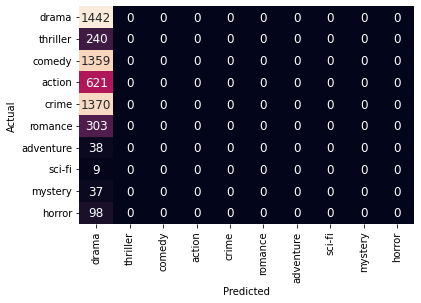

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import numpy as np

all_labels = ['drama', 'thriller', 'comedy', 'action', 'crime', 'romance', 'adventure', 'sci-fi', 'mystery', 'horror']
labels_cluster_predict = ['action' for i in range(len(cluster_labels))]

print(len(labels_cluster_predict), len(cluster_labels))

def plotConfusionMatrix(labels_val, labels_predicted):
  x = confusion_matrix(labels_val, labels_predicted)
  plot = sn.heatmap(np.array(x), 
                    annot=True, 
                    annot_kws={"size": 12}, 
                    fmt='g', 
                    cbar=False,
                    xticklabels=all_labels, 
                    yticklabels=all_labels)
  plot.set(xlabel='Predicted', ylabel='Actual')
  return plot

plotConfusionMatrix(cluster_labels, labels_cluster_predict)

(d) What trends, if any, do you notice from the confusion matrix? Does it look like some clusters are able to pick up on a single label? When a cluster includes multiple labels, are they related? [2 marks]

## **Part 3 Comparing Classifiers**

### Vector Preparation

### Training Models

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(texts_train)
tfidf_val = vectorizer.transform(texts_val)

print(f"{tfidf_train.shape=}")
print(f"{tfidf_val.shape=}")

tfidf_train.shape=(3291, 10384)
tfidf_val.shape=(1097, 10384)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import spacy
def text_pipeline_simple_spacy(conv_text):
  tokens = []
  nlp = spacy.load("en_core_web_sm")
  nlp.remove_pipe('parser')
  doc = nlp(conv_text)
  for token in doc:
    if not token.is_space and not token.is_punct:
      tokens.append(token.lemma_.lower())
  return tokens

In [ ]:
from tqdm import tqdm
train_tokens = []
for conva in tqdm(texts_train):
  #这时候每一个conva都是一长段的字符串
  one_list = text_pipeline_simple_spacy(conva)
  #之后数据处理用的都是token，这里提前处理了
  train_tokens.append(one_list)

val_tokens = []
for conva in tqdm(texts_val):
  #这时候每一个conva都是一长段的字符串
  one_list = text_pipeline_simple_spacy(conva)
  #之后数据处理用的都是token，这里提前处理了
  val_tokens.append(one_list)


100%|██████████| 1095/1095 [10:57<00:00,  1.66it/s]


To make train and val sets have the same features, exclusive tokens in vocabulary list of training set will be ignored:

In [ ]:
import random
vocab_train = make_vocabulary(train_tokens)
vocab_val = make_vocabulary(val_tokens)

In [ ]:
def make_onehot_dense(tokens, vocab):
  vector = [ 0 for _ in vocab ]
  for t in tokens:
    id = vocab[t]
    vector[id] = 1
  return vector

In [ ]:
def make_onehot_ignorenewtokens(tokens, vocab):
  sparse_vector = { vocab[t]:1 for t in sorted(set(tokens)) if t in vocab }
  return sparse_vector

In [ ]:
def sparse_to_dense(sv, vector_length):
  dense_vector = []
  for index in range(vector_length):
    dense_vector.append(sv.get(index,0))
  return dense_vector

In [ ]:
onehot_val = [make_onehot_dense(tokens, vocab_val) for tokens in val_tokens]

In [ ]:
sparse_train = [make_onehot_ignorenewtokens(tokens, vocab_val) for tokens in train_tokens]
onehot_train = []
for sv in sparse_train:
  vec = sparse_to_dense(sv, len(vocab_val))
  onehot_train.append(vec)

All vectors for classification are prepared:

Sparse tfidf vectors : tfidf_val and tfidf_train

Dense onehot vectors : onehot_val and onehot_train

####Dummy Classifier with strategy="most_frequent"

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf1 = DummyClassifier(strategy="most_frequent")
dummy_clf1.fit(onehot_train, labels_train)
labels_predicted_dummyt = dummy_clf1.predict(onehot_train)
labels_predicted_dummyv = dummy_clf1.predict(onehot_val)

In [ ]:
print("=============on training set====on validation set ")
accuracy_dt1 = accuracy_score(labels_train, labels_predicted_dummyt)
accuracy_dv1 = accuracy_score(labels_val, labels_predicted_dummyv)
print(f"{accuracy_dt1=:10.3}",f"{accuracy_dv1=:10.3f}")

precision_dt1 = precision_score(labels_train, labels_predicted_dummyt, average="macro")
precision_dv1 = precision_score(labels_val, labels_predicted_dummyv, average="macro")
print(f"{precision_dt1=:10.3}",f"{precision_dv1=:10.3f}")

recall_dt1 = recall_score(labels_train, labels_predicted_dummyt, average="macro")
recall_dv1 = recall_score(labels_val, labels_predicted_dummyv, average="macro")
print(f"{recall_dt1=:10.3}",f"{recall_dv1=:10.3f}")

f1_dt1 = f1_score(labels_train, labels_predicted_dummyt, average="macro")
f1_dv1 = f1_score(labels_val, labels_predicted_dummyv, average="macro")
print(f"{f1_dt1=:10.3}",f"{f1_dv1=:10.3f}")


====on validation set====on training set 
accuracy_dt1=     0.253 accuracy_dv1=     0.238
precision_dt1=    0.0253 precision_dv1=     0.024
recall_dt1=       0.1 recall_dv1=     0.100
f1_dt1=    0.0404 f1_dv1=     0.038


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Dummy Classifier with strategy="stratified"

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf2 = DummyClassifier(strategy="stratified", random_state=123)
dummy_clf2.fit(onehot_train, labels_train)
labels_predicted2_dummyt = dummy_clf2.predict(onehot_train)
labels_predicted2_dummyv = dummy_clf2.predict(onehot_val)

In [ ]:
print("=============on training set====on validation set ")
accuracy_dt2 = accuracy_score(labels_train, labels_predicted2_dummyt)
accuracy_dv2 = accuracy_score(labels_val, labels_predicted2_dummyv)
print(f"{accuracy_dt2=:10.3}",f"{accuracy_dv2=:10.3f}")

precision_dt2 = precision_score(labels_train, labels_predicted2_dummyt, average="macro")
precision_dv2 = precision_score(labels_val, labels_predicted2_dummyv, average="macro")
print(f"{precision_dt2=:10.3}",f"{precision_dv2=:10.3f}")

recall_dt2 = recall_score(labels_train, labels_predicted2_dummyt, average="macro")
recall_dv2 = recall_score(labels_val, labels_predicted2_dummyv, average="macro")
print(f"{recall_dt2=:10.3}",f"{recall_dv2=:10.3f}")

f1_dt2 = f1_score(labels_train, labels_predicted2_dummyt, average="macro")
f1_dv2 = f1_score(labels_val, labels_predicted2_dummyv, average="macro")
print(f"{f1_dt2=:10.3}",f"{f1_dv2=:10.3f}")

=============on validation set====on training set 
accuracy_dt2=     0.191 accuracy_dv2=     0.190
precision_dt2=    0.0962 precision_dv2=     0.091
recall_dt2=    0.0962 recall_dv2=     0.090
f1_dt2=    0.0962 f1_dv2=     0.090


#### LogisticRegression with One-hot vectorization

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf_onehot = LogisticRegression(random_state=42)
lr_clf_onehot.fit(onehot_train, labels_train)
labels_predicted_lone_val = lr_clf_onehot.predict(onehot_val)
labels_predicted_lone_train = lr_clf_onehot.predict(onehot_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("=============on training set====on validation set ")
accuracy_ltone = accuracy_score(labels_train, labels_predicted_lone_train)
accuracy_lvone = accuracy_score(labels_val, labels_predicted_lone_val)
print(f"{accuracy_ltone=:10.3}",f"{accuracy_lvone=:10.3f}")

precision_ltone = precision_score(labels_train, labels_predicted_lone_train, average="macro")
precision_lvone = precision_score(labels_val, labels_predicted_lone_val, average="macro")
print(f"{precision_ltone=:10.3}",f"{precision_lvone=:10.3f}")

recall_ltone = recall_score(labels_train, labels_predicted_lone_train, average="macro")
recall_lvone = recall_score(labels_val, labels_predicted_lone_val, average="macro")
print(f"{recall_ltone=:10.3}",f"{recall_lvone=:10.3f}")

f1_ltone = f1_score(labels_train, labels_predicted_lone_train, average="macro")
f1_lvone = f1_score(labels_val, labels_predicted_lone_val, average="macro")
print(f"{f1_ltone=:10.3}",f"{f1_lvone=:10.3f}")

=============on training set====on validation set 
accuracy_ltone=     0.853 accuracy_lvone=     0.359
precision_ltone=     0.935 precision_lvone=     0.293
recall_ltone=     0.777 recall_lvone=     0.197
f1_ltone=     0.839 f1_lvone=     0.213


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### LogisticRegression with TF-IDF vectorization (default settings)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf_tfidf = LogisticRegression()
lr_clf_tfidf.fit(tfidf_train, labels_train)
labels_predicted_ltfidf_val = lr_clf_tfidf.predict(tfidf_val)
labels_predicted_ltfidf_train = lr_clf_tfidf.predict(tfidf_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("=============on training set====on validation set ")
accuracy_lttfidf = accuracy_score(labels_train, labels_predicted_ltfidf_train)
accuracy_lvtfidf = accuracy_score(labels_val, labels_predicted_ltfidf_val)
print(f"{accuracy_lttfidf=:10.3}",f"{accuracy_lvtfidf=:10.3f}")

precision_lttfidf = precision_score(labels_train, labels_predicted_ltfidf_train, average="macro")
precision_lvtfidf = precision_score(labels_val, labels_predicted_ltfidf_val, average="macro")
print(f"{precision_lttfidf=:10.3}",f"{precision_lvtfidf=:10.3f}")

recall_lttfidf = recall_score(labels_train, labels_predicted_ltfidf_train, average="macro")
recall_lvtfidf = recall_score(labels_val, labels_predicted_ltfidf_val, average="macro")
print(f"{recall_lttfidf=:10.3}",f"{recall_lvtfidf=:10.3f}")

f1_lttfidf = f1_score(labels_train, labels_predicted_ltfidf_train, average="macro")
f1_lvtfidf = f1_score(labels_val, labels_predicted_ltfidf_val, average="macro")
print(f"{f1_lttfidf=:10.3}",f"{f1_lvtfidf=:10.3f}")

=============on training set====on validation set 
accuracy_lttfidf=     0.684 accuracy_lvtfidf=     0.341
precision_lttfidf=     0.493 precision_lvtfidf=     0.123
recall_lttfidf=     0.306 recall_lvtfidf=     0.140
f1_lttfidf=     0.299 f1_lvtfidf=     0.123


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### SVC Classifier with One-hot vectorization (SVM with RBF kernel, default settings

In [ ]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='rbf')
clf_svc.fit(onehot_train, labels_train)
labels_predicted_svc_val = clf_svc.predict(onehot_val)
labels_predicted_svc_train = clf_svc.predict(onehot_train)

In [ ]:
print("=============on training set====on validation set ")
accuracy_svct = accuracy_score(labels_train, labels_predicted_svc_train)
accuracy_svcv = accuracy_score(labels_val, labels_predicted_svc_val)
print(f"{accuracy_svct=:10.3}",f"{accuracy_svcv=:10.3f}")

precision_svct = precision_score(labels_train, labels_predicted_svc_train, average="macro")
precision_svcv = precision_score(labels_val, labels_predicted_svc_val, average="macro")
print(f"{precision_svct=:10.3}", f"{precision_svcv=:10.3f}")

recall_svct = recall_score(labels_train, labels_predicted_svc_train, average="macro")
recall_svcv= recall_score(labels_val, labels_predicted_svc_val, average="macro")
print(f"{recall_svct=:10.3}",f"{recall_svcv=:10.3f}")

f1_svct = f1_score(labels_train, labels_predicted_svc_train, average="macro")
f1_svcv = f1_score(labels_val, labels_predicted_svc_val, average="macro")
print(f"{f1_svct=:10.3}",f"{f1_svcv=:10.3f}")

=============on training set====on validation set 
accuracy_svct=     0.676 accuracy_svcv=     0.324
precision_svct=     0.802 precision_svcv=     0.199
recall_svct=     0.342 recall_svcv=     0.132
f1_svct=     0.375 f1_svcv=     0.114


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluation of the five methods above

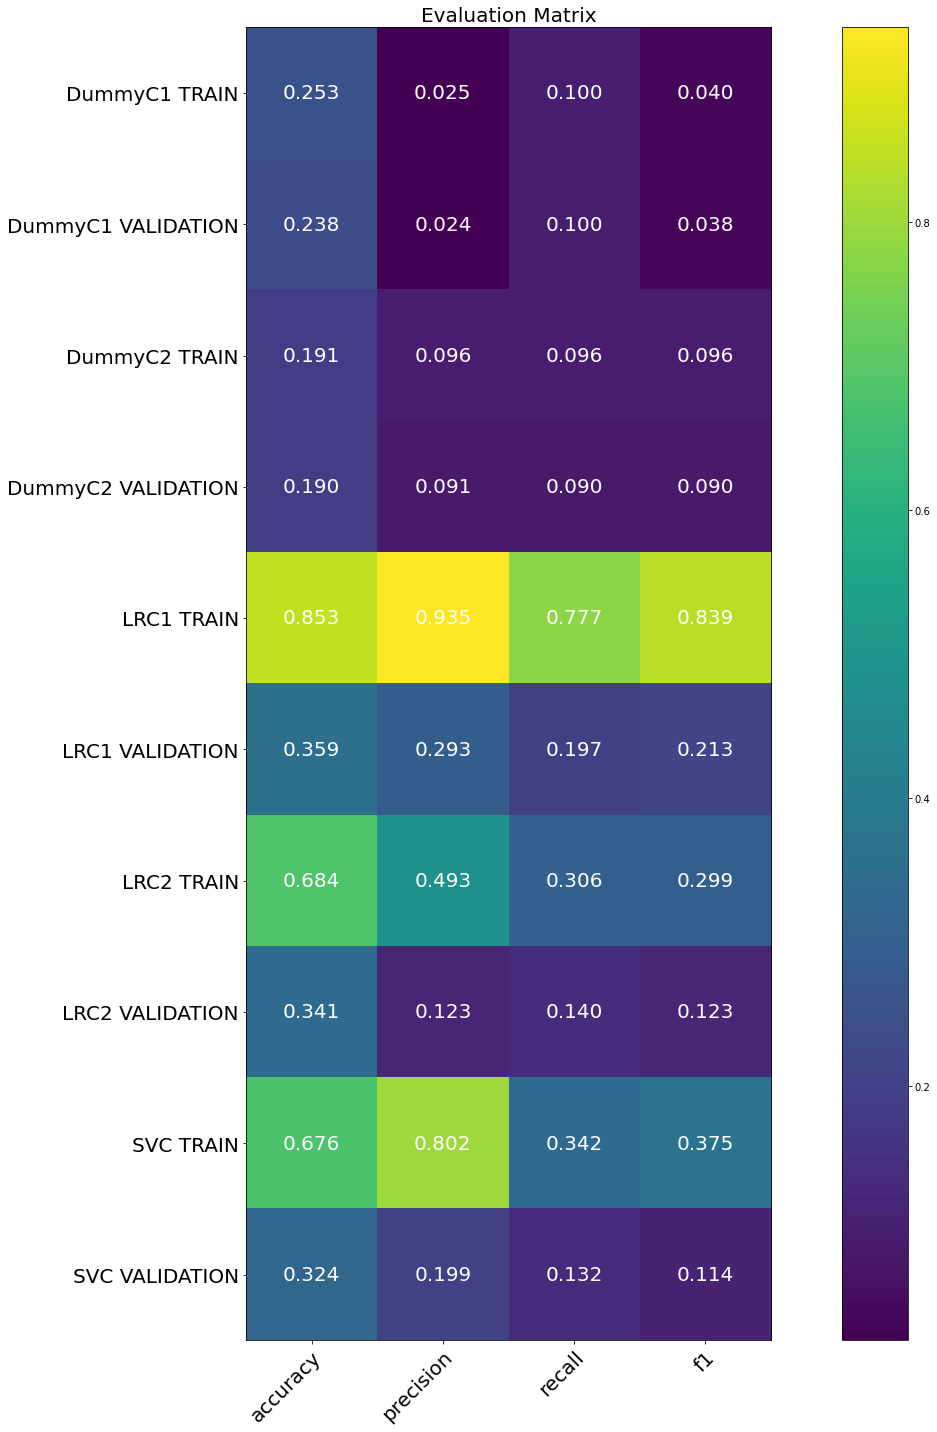

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dummy1_train = [accuracy_dt1,precision_dt1,recall_dt1, f1_dt1]
dummy1_val = [accuracy_dv1,precision_dv1,recall_dv1, f1_dv1]
dummy2_train = [accuracy_dt2, precision_dt2, recall_dt2, f1_dt2]
dummy2_val = [accuracy_dv2, precision_dv2, recall_dv2, f1_dv2]
lr1_train = [accuracy_ltone, precision_ltone, recall_ltone, f1_ltone]
lr1_val = [accuracy_lvone, precision_lvone, recall_lvone, f1_lvone]
lr2_train = [accuracy_lttfidf, precision_lttfidf, recall_lttfidf,f1_lttfidf]
lr2_val = [accuracy_lvtfidf, precision_lvtfidf, recall_lvtfidf,f1_lvtfidf]
svc_train = [accuracy_svct,precision_svct, recall_svct,f1_svct]
svc_val = [accuracy_svcv,precision_svcv, recall_svcv,f1_svcv]
datas = np.array([dummy1_train, dummy1_val, dummy2_train, dummy2_val, lr1_train, lr1_val, lr2_train, lr2_val, svc_train, svc_val]) 
evaluations = ["accuracy", "precision", "recall", "f1"]
types = [
      "DummyC1 TRAIN",
      "DummyC1 VALIDATION",   
      "DummyC2 TRAIN",
      "DummyC2 VALIDATION",
      "LRC1 TRAIN" ,
      "LRC1 VALIDATION" ,
      "LRC2 TRAIN",
      "LRC2 VALIDATION",
      "SVC TRAIN",
      "SVC VALIDATION"
      ]

dataframe = pd.DataFrame(datas, columns=evaluations, index=types)
# print(dataframe)
from decimal import Decimal

plt.xticks(np.arange(len(evaluations)), labels=evaluations, 
                     rotation=45, rotation_mode="anchor", ha="right" ,fontsize=20)
plt.yticks(np.arange(len(types)), labels=types, fontsize=20)    
plt.title("Evaluation Matrix",fontsize=20)

for i in range(len(types)):
  for j in range(len(evaluations)):
    text = plt.text(j, i, Decimal(datas[i, j]).quantize(Decimal('0.000')), ha="center", va="center", color="w",fontsize=20)
plt.rcParams['figure.figsize']=(20, 20)
plt.imshow(datas)
plt.colorbar()
plt.tight_layout()
plt.show()


Simple introduction of models:

logistic regression: a widely used classifier that can deal with dependencies between features and incorporate arbitrary features easily, but it will overfit on very sparse data like the one-hot vectors in this trial. 

SVC: a model with a selected kernel which reflects data to higher dimension and then aims to find the largest margin among groups with a separation. It is effective in high dimensional spaces even there are more dimensions than the samples. It is designed for binary question, so the multiclass classificaiton is handled in one-vs-one scheme.

Using dummy results as baselines, firstly discussing the situation on the training set (LRC1, LRC2, SVC correlating to LogisticRegression with One-hot vectorization, LogisticRegression with TF-IDF vectorization, SVC respectively), it shows that all of them performed well by taking accuracy into consideration that they all classified over half of the conversations into the right genres, LCR1 did especially well in this perspective. When it comes to precision, LCR1 and SVC both achieved the goal that most of the conversations assigned to one genre are truly tagged with this genre, whereas LRC2 only did a little bit less than half of that. And for the recall score, only LRC1 took over 70% that conversations in one genre are correctly classified, neither LCR2 nor SVC just achieved nearly 30%. This is the same situation on f1 score. And all this trend occurred in validation set but with much lower socres in four measurements, which may be related to overfitting problem.

More specificlly, accuracy is a kind of global measurement on all data which may be useless on unbalanced dataset, so precision and recall which explore the situation in each classification are more useful. Based on this, it can be seen from the figure above that for three models, overfitting occurred in LRC1 and SVC to some extent, since the scores of precision, recall and f1 on the training set displayed higher than those on the validation set, especially on model LRC1. For model LRC1, there are over 4000 feathers, which may be one reason for its definetly overfitting. However, on LRC2, both precision and recall scores of training set and validation set are under 50%, implying the underfitting of this model. 

In the section on the exploration of the dataset, to get a more balanced dataset, only the 10 most frequent genres were maintained, but showing their counts: 

('drama', 3240), ('thriller', 2522), ('comedy', 1776), ('action', 1535), ('crime', 1479), ('romance', 1395), ('mystery', 1086), ('sci-fi', 1078), ('adventure', 1066), ('horror', 836),

there are over 3000 conversations in the most genre class which is three or four times more than some of the others, so it cannot be treated as a balanced dataset. And after vectorization, it can be seen that an apparent noise occurred: like 'didn't', '--name' and '$', they are stored as didn, t, didn't, --name, $, indicating an optimizing on tokenization and vectorization.

Summarising, the best performance came from LogisticRegression with One-hot vectorization, f1-scores on each class are shown in bar charts.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
# report_val = classification_report(labels_val, labels_predicted_lone_val, target_names=['drama', 'thriller', 'comedy', 'action', 'crime', 'romance', 'sci-fi', 'adventure', 'mystery', 'horror'])
labels=['drama', 'thriller', 'comedy', 'action', 'crime', 'romance', 'sci-fi', 'adventure', 'mystery', 'horror']
p_class_val, r_class_val, f_class_val, support_micro_val = precision_recall_fscore_support(
                y_true=labels_val, y_pred=labels_predicted_lone_val, labels=labels, average=None)

p_class_t, r_class_t, f_class_t, support_micro_t = precision_recall_fscore_support(
                y_true=labels_train, y_pred=labels_predicted_lone_train, labels=labels, average=None)

print(f_class_val)

[0.39652174 0.         0.4265233  0.3908046  0.22857143 0.
 0.4        0.11764706 0.         0.17204301]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


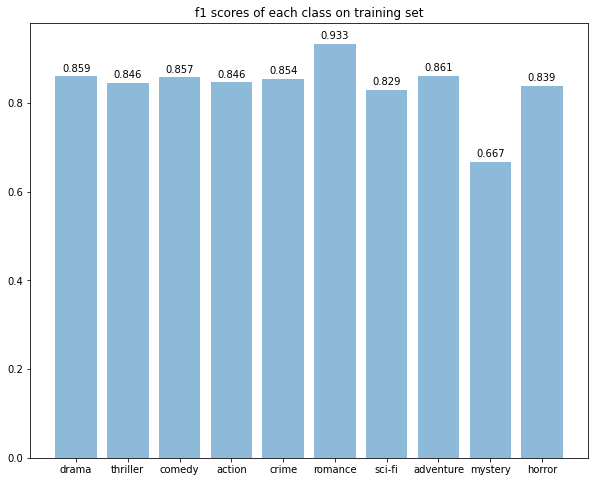

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
bars2 = plt.bar(labels, f_class_t, align='center', alpha=0.5)
plt.title("f1 scores of each class on training set")
for b in bars2: 
  height = b.get_height()
  ax.annotate(np.round(height, 3),
        xy=(b.get_x() + b.get_width() / 2, height), 
        xytext=(0,3), 
        textcoords="offset points", 
        va = 'bottom', ha = 'center' 
        )
plt.show()

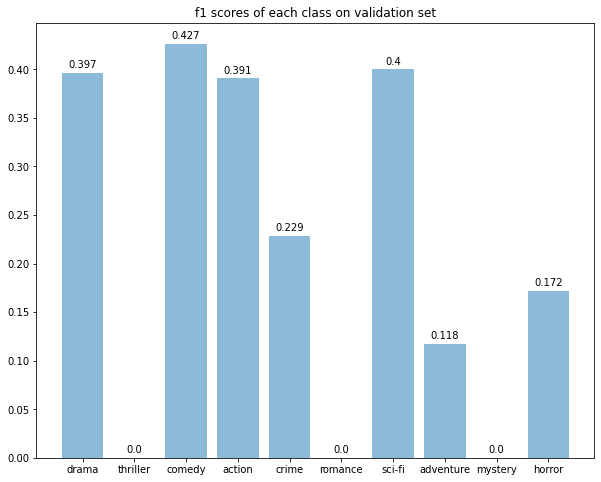

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
bars1 = plt.bar(labels, f_class_val, align='center', alpha=0.5)
plt.title("f1 scores of each class on validation set")
for b in bars1: 
  height = b.get_height()
  ax.annotate(np.round(height, 3),
        xy=(b.get_x() + b.get_width() / 2, height), 
        xytext=(0,3), 
        textcoords="offset points", 
        va = 'bottom', ha = 'center' 
        )
plt.show()

### RandomForest Classifier


In [ ]:
import spacy
def text_pipeline_simple_spacy(conv_text):
  tokens = []
  nlp = spacy.load("en_core_web_sm")
  nlp.remove_pipe('parser')
  doc = nlp(conv_text)
  for token in doc:
    if not token.is_space and not token.is_punct:
      tokens.append(token.lemma_.lower())
  return tokens

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=text_pipeline_simple_spacy)
# vectorizer = TfidfVectorizer()
tfidf_train_spacy = vectorizer.fit_transform(texts_train)
tfidf_val_spacy = vectorizer.transform(texts_val)

print(f"{tfidf_train_spacy.shape=}")
print(f"{tfidf_val_spacy.shape=}")

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


tfidf_train_spacy.shape=(3291, 9017)
tfidf_val_spacy.shape=(1097, 9017)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(random_state=42, n_estimators=500)
clf_RF.fit(tfidf_train_spacy,labels_train)
labels_predicted_rf_val = clf_RF.predict(tfidf_val_spacy)
labels_predicted_rf_train = clf_RF.predict(tfidf_train_spacy)

In [ ]:
print("=============on training set====on validation set ")
accuracy_gnbt = accuracy_score(labels_train, labels_predicted_rf_train)
accuracy_gnbv = accuracy_score(labels_val, labels_predicted_rf_val)
print(f"{accuracy_gnbt=:10.3}",f"{accuracy_gnbv=:10.3f}")

precision_gnbt = precision_score(labels_train, labels_predicted_rf_train, average="macro")
precision_gnbv = precision_score(labels_val, labels_predicted_rf_val, average="macro")
print(f"{precision_gnbt=:10.3}", f"{precision_gnbv=:10.3f}")

recall_gnbt = recall_score(labels_train, labels_predicted_rf_train, average="macro")
recall_gnbv= recall_score(labels_val, labels_predicted_rf_val, average="macro")
print(f"{recall_gnbt=:10.3}",f"{recall_gnbv=:10.3f}")

f1_gnbt = f1_score(labels_train, labels_predicted_rf_train, average="macro")
f1_gnbv = f1_score(labels_val, labels_predicted_rf_val, average="macro")
print(f"{f1_gnbt=:10.3}",f"{f1_gnbv=:10.3f}")

=============on training set====on validation set 
accuracy_gnbt=       1.0 accuracy_gnbv=     0.373
precision_gnbt=       1.0 precision_gnbv=     0.575
recall_gnbt=       1.0 recall_gnbv=     0.184
f1_gnbt=       1.0 f1_gnbv=     0.195


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest is an intrgration of many sperated decision trees (bagging method). When a sample is inputed, the class of it is decided by the count of classification result made by trees in this forest. And each inner node of the decisioin tree is a desicion based on attribution. After going through the decided branches, the leaf node is the decision result. Here selected the parameter n_estimators=500 as the number of trees in this forest.

Using spacy to do tokenization, the result shows that on the training set, all scores are 1 higher than the scores of five other models, indicating this model can classify all conversations correctly into their genres. But on the validation set, the scores are much lower than those in training set even if the precision score is over 50%. This may be due to overfitting.

## **Part 4 Parameter Tuning**

### Searching process

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        "class_weight": [None, "balanced"],
        'max_df' : [0.6, 0.7, 0.8, 0.9],
        "sublinear_tf" :[True, False], 
        "max_features": [None, 1000, 3000, 5000, 6000, 7000, 8000, 9000, 10000]}
best_params, best_f1 = None, 0
for params in ParameterGrid(param_grid):
    vectorizer = TfidfVectorizer(sublinear_tf=params['sublinear_tf'],max_df=params["max_df"], max_features=params['max_features'])
    X_train = vectorizer.fit_transform(texts_train)
    X_val = vectorizer.transform(texts_val)
    
    clf = LogisticRegression(random_state=42, C=params['C'], class_weight=params['class_weight'])
    clf.fit(X_train,labels_train)
    
    labels_predicted = clf.predict(X_val)
    
    f1 = f1_score(labels_val, labels_predicted, average="macro")
    print(f"  Evaluating {params=} {f1=:.3f}")

    if f1 > best_f1:
        best_params = params
        best_f1 = f1



  Evaluating params={'C': 0.01, 'class_weight': None, 'max_df': 0.6, 'max_features': None, 'sublinear_tf': True} f1=0.081
  Evaluating params={'C': 0.01, 'class_weight': None, 'max_df': 0.6, 'max_features': None, 'sublinear_tf': False} f1=0.081
  Evaluating params={'C': 0.01, 'class_weight': None, 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': True} f1=0.078
  Evaluating params={'C': 0.01, 'class_weight': None, 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': False} f1=0.078
  Evaluating params={'C': 0.01, 'class_weight': None, 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': True} f1=0.080
  Evaluating params={'C': 0.01, 'class_weight': None, 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': False} f1=0.081
  Evaluating params={'C': 0.01, 'class_weight': None, 'max_df': 0.6, 'max_features': 5000, 'sublinear_tf': True} f1=0.080
  Evaluating params={'C': 0.01, 'class_weight': None, 'max_df': 0.6, 'max_features': 5000, 'sublinear_tf': False} f1=0.081
  Evaluating params=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': None, 'sublinear_tf': True} f1=0.134


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': None, 'sublinear_tf': False} f1=0.130


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': True} f1=0.111


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': False} f1=0.111
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': True} f1=0.127


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': False} f1=0.130
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 5000, 'sublinear_tf': True} f1=0.131


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 5000, 'sublinear_tf': False} f1=0.130


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 6000, 'sublinear_tf': True} f1=0.134


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 6000, 'sublinear_tf': False} f1=0.129


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 7000, 'sublinear_tf': True} f1=0.133


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 7000, 'sublinear_tf': False} f1=0.134


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 8000, 'sublinear_tf': True} f1=0.135


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 8000, 'sublinear_tf': False} f1=0.132
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 9000, 'sublinear_tf': True} f1=0.133
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 9000, 'sublinear_tf': False} f1=0.132


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 10000, 'sublinear_tf': True} f1=0.134


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.6, 'max_features': 10000, 'sublinear_tf': False} f1=0.130


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': None, 'sublinear_tf': True} f1=0.134
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': None, 'sublinear_tf': False} f1=0.134


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 1000, 'sublinear_tf': True} f1=0.111


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 1000, 'sublinear_tf': False} f1=0.111


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 3000, 'sublinear_tf': True} f1=0.129


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 3000, 'sublinear_tf': False} f1=0.133


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 5000, 'sublinear_tf': True} f1=0.132
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 5000, 'sublinear_tf': False} f1=0.131
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 6000, 'sublinear_tf': True} f1=0.133


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 6000, 'sublinear_tf': False} f1=0.132


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 7000, 'sublinear_tf': True} f1=0.132


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 7000, 'sublinear_tf': False} f1=0.134


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 8000, 'sublinear_tf': True} f1=0.132


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 8000, 'sublinear_tf': False} f1=0.133


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 9000, 'sublinear_tf': True} f1=0.135


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 9000, 'sublinear_tf': False} f1=0.136


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 10000, 'sublinear_tf': True} f1=0.134
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.7, 'max_features': 10000, 'sublinear_tf': False} f1=0.134


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': None, 'sublinear_tf': True} f1=0.134
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': None, 'sublinear_tf': False} f1=0.134


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 1000, 'sublinear_tf': True} f1=0.111


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 1000, 'sublinear_tf': False} f1=0.111


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 3000, 'sublinear_tf': True} f1=0.129


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 3000, 'sublinear_tf': False} f1=0.133


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 5000, 'sublinear_tf': True} f1=0.132
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 5000, 'sublinear_tf': False} f1=0.131
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 6000, 'sublinear_tf': True} f1=0.133


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 6000, 'sublinear_tf': False} f1=0.132


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 7000, 'sublinear_tf': True} f1=0.132


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 7000, 'sublinear_tf': False} f1=0.134


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 8000, 'sublinear_tf': True} f1=0.132


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 8000, 'sublinear_tf': False} f1=0.133


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 9000, 'sublinear_tf': True} f1=0.135


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 9000, 'sublinear_tf': False} f1=0.136


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 10000, 'sublinear_tf': True} f1=0.134
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.8, 'max_features': 10000, 'sublinear_tf': False} f1=0.134


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': None, 'sublinear_tf': True} f1=0.134
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': None, 'sublinear_tf': False} f1=0.134


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 1000, 'sublinear_tf': True} f1=0.111


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 1000, 'sublinear_tf': False} f1=0.111


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 3000, 'sublinear_tf': True} f1=0.129


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 3000, 'sublinear_tf': False} f1=0.133


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 5000, 'sublinear_tf': True} f1=0.132
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 5000, 'sublinear_tf': False} f1=0.131
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 6000, 'sublinear_tf': True} f1=0.133


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 6000, 'sublinear_tf': False} f1=0.132


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 7000, 'sublinear_tf': True} f1=0.132


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 7000, 'sublinear_tf': False} f1=0.134


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 8000, 'sublinear_tf': True} f1=0.132


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 8000, 'sublinear_tf': False} f1=0.133


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 9000, 'sublinear_tf': True} f1=0.135


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 9000, 'sublinear_tf': False} f1=0.136


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 10000, 'sublinear_tf': True} f1=0.134
  Evaluating params={'C': 1, 'class_weight': None, 'max_df': 0.9, 'max_features': 10000, 'sublinear_tf': False} f1=0.134
  Evaluating params={'C': 1, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': None, 'sublinear_tf': True} f1=0.220
  Evaluating params={'C': 1, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': None, 'sublinear_tf': False} f1=0.218
  Evaluating params={'C': 1, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': True} f1=0.172
  Evaluating params={'C': 1, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': False} f1=0.166
  Evaluating params={'C': 1, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': True} f1=0.196
  Evaluating params={'C': 1, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': False} f1=0.196
  Eval

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': None, 'sublinear_tf': True} f1=0.232


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': None, 'sublinear_tf': False} f1=0.236


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': True} f1=0.191


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': False} f1=0.205


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': True} f1=0.215


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': False} f1=0.224


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 5000, 'sublinear_tf': True} f1=0.231


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 5000, 'sublinear_tf': False} f1=0.237


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 6000, 'sublinear_tf': True} f1=0.231


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 6000, 'sublinear_tf': False} f1=0.233


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 7000, 'sublinear_tf': True} f1=0.234


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 7000, 'sublinear_tf': False} f1=0.231


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 8000, 'sublinear_tf': True} f1=0.241


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 8000, 'sublinear_tf': False} f1=0.236


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 9000, 'sublinear_tf': True} f1=0.229


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 9000, 'sublinear_tf': False} f1=0.243


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 10000, 'sublinear_tf': True} f1=0.232


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.6, 'max_features': 10000, 'sublinear_tf': False} f1=0.236


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': None, 'sublinear_tf': True} f1=0.239


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': None, 'sublinear_tf': False} f1=0.232


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 1000, 'sublinear_tf': True} f1=0.190


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 1000, 'sublinear_tf': False} f1=0.196


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 3000, 'sublinear_tf': True} f1=0.220


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 3000, 'sublinear_tf': False} f1=0.228


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 5000, 'sublinear_tf': True} f1=0.232


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 5000, 'sublinear_tf': False} f1=0.236


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 6000, 'sublinear_tf': True} f1=0.233


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 6000, 'sublinear_tf': False} f1=0.230


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 7000, 'sublinear_tf': True} f1=0.236


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 7000, 'sublinear_tf': False} f1=0.237


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 8000, 'sublinear_tf': True} f1=0.239


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 8000, 'sublinear_tf': False} f1=0.236


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 9000, 'sublinear_tf': True} f1=0.234


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 9000, 'sublinear_tf': False} f1=0.239


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 10000, 'sublinear_tf': True} f1=0.239


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.7, 'max_features': 10000, 'sublinear_tf': False} f1=0.232


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': None, 'sublinear_tf': True} f1=0.239


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': None, 'sublinear_tf': False} f1=0.232


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 1000, 'sublinear_tf': True} f1=0.190


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 1000, 'sublinear_tf': False} f1=0.196


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 3000, 'sublinear_tf': True} f1=0.220


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 3000, 'sublinear_tf': False} f1=0.228


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 5000, 'sublinear_tf': True} f1=0.232


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 5000, 'sublinear_tf': False} f1=0.236


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 6000, 'sublinear_tf': True} f1=0.233


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 6000, 'sublinear_tf': False} f1=0.230


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 7000, 'sublinear_tf': True} f1=0.236


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 7000, 'sublinear_tf': False} f1=0.237


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 8000, 'sublinear_tf': True} f1=0.239


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 8000, 'sublinear_tf': False} f1=0.236


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 9000, 'sublinear_tf': True} f1=0.234


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 9000, 'sublinear_tf': False} f1=0.239


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 10000, 'sublinear_tf': True} f1=0.239


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.8, 'max_features': 10000, 'sublinear_tf': False} f1=0.232


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': None, 'sublinear_tf': True} f1=0.239


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': None, 'sublinear_tf': False} f1=0.232


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 1000, 'sublinear_tf': True} f1=0.190


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 1000, 'sublinear_tf': False} f1=0.196


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 3000, 'sublinear_tf': True} f1=0.220


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 3000, 'sublinear_tf': False} f1=0.228


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 5000, 'sublinear_tf': True} f1=0.232


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 5000, 'sublinear_tf': False} f1=0.236


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 6000, 'sublinear_tf': True} f1=0.233


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 6000, 'sublinear_tf': False} f1=0.230


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 7000, 'sublinear_tf': True} f1=0.236


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 7000, 'sublinear_tf': False} f1=0.237


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 8000, 'sublinear_tf': True} f1=0.239


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 8000, 'sublinear_tf': False} f1=0.236


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 9000, 'sublinear_tf': True} f1=0.234


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 9000, 'sublinear_tf': False} f1=0.239


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 10000, 'sublinear_tf': True} f1=0.239


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': None, 'max_df': 0.9, 'max_features': 10000, 'sublinear_tf': False} f1=0.232


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': None, 'sublinear_tf': True} f1=0.250


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': None, 'sublinear_tf': False} f1=0.254


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': True} f1=0.190


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': False} f1=0.190


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': True} f1=0.222


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': False} f1=0.225


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 5000, 'sublinear_tf': True} f1=0.237


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 5000, 'sublinear_tf': False} f1=0.240


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 6000, 'sublinear_tf': True} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 6000, 'sublinear_tf': False} f1=0.243


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 7000, 'sublinear_tf': True} f1=0.243


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 7000, 'sublinear_tf': False} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 8000, 'sublinear_tf': True} f1=0.249


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 8000, 'sublinear_tf': False} f1=0.244


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 9000, 'sublinear_tf': True} f1=0.246


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 9000, 'sublinear_tf': False} f1=0.246


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 10000, 'sublinear_tf': True} f1=0.250


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 10000, 'sublinear_tf': False} f1=0.254


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': None, 'sublinear_tf': True} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': None, 'sublinear_tf': False} f1=0.250


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 1000, 'sublinear_tf': True} f1=0.189


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 1000, 'sublinear_tf': False} f1=0.193


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 3000, 'sublinear_tf': True} f1=0.221


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 3000, 'sublinear_tf': False} f1=0.223


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 5000, 'sublinear_tf': True} f1=0.237


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 5000, 'sublinear_tf': False} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 6000, 'sublinear_tf': True} f1=0.241


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 6000, 'sublinear_tf': False} f1=0.241


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 7000, 'sublinear_tf': True} f1=0.246


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 7000, 'sublinear_tf': False} f1=0.242


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 8000, 'sublinear_tf': True} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 8000, 'sublinear_tf': False} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 9000, 'sublinear_tf': True} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 9000, 'sublinear_tf': False} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 10000, 'sublinear_tf': True} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 10000, 'sublinear_tf': False} f1=0.250


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': None, 'sublinear_tf': True} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': None, 'sublinear_tf': False} f1=0.250


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 1000, 'sublinear_tf': True} f1=0.189


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 1000, 'sublinear_tf': False} f1=0.193


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 3000, 'sublinear_tf': True} f1=0.221


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 3000, 'sublinear_tf': False} f1=0.223


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 5000, 'sublinear_tf': True} f1=0.237


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 5000, 'sublinear_tf': False} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 6000, 'sublinear_tf': True} f1=0.241


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 6000, 'sublinear_tf': False} f1=0.241


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 7000, 'sublinear_tf': True} f1=0.246


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 7000, 'sublinear_tf': False} f1=0.242


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 8000, 'sublinear_tf': True} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 8000, 'sublinear_tf': False} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 9000, 'sublinear_tf': True} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 9000, 'sublinear_tf': False} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 10000, 'sublinear_tf': True} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 10000, 'sublinear_tf': False} f1=0.250


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': None, 'sublinear_tf': True} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': None, 'sublinear_tf': False} f1=0.250


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 1000, 'sublinear_tf': True} f1=0.189


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 1000, 'sublinear_tf': False} f1=0.193


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 3000, 'sublinear_tf': True} f1=0.221


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 3000, 'sublinear_tf': False} f1=0.223


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 5000, 'sublinear_tf': True} f1=0.237


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 5000, 'sublinear_tf': False} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 6000, 'sublinear_tf': True} f1=0.241


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 6000, 'sublinear_tf': False} f1=0.241


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 7000, 'sublinear_tf': True} f1=0.246


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 7000, 'sublinear_tf': False} f1=0.242


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 8000, 'sublinear_tf': True} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 8000, 'sublinear_tf': False} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 9000, 'sublinear_tf': True} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 9000, 'sublinear_tf': False} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 10000, 'sublinear_tf': True} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 10, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 10000, 'sublinear_tf': False} f1=0.250


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': None, 'sublinear_tf': True} f1=0.253


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': None, 'sublinear_tf': False} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': True} f1=0.198


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': False} f1=0.195


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': True} f1=0.229


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': False} f1=0.230


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 5000, 'sublinear_tf': True} f1=0.237


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 5000, 'sublinear_tf': False} f1=0.250


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 6000, 'sublinear_tf': True} f1=0.252


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 6000, 'sublinear_tf': False} f1=0.253


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 7000, 'sublinear_tf': True} f1=0.250


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 7000, 'sublinear_tf': False} f1=0.251


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 8000, 'sublinear_tf': True} f1=0.250


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 8000, 'sublinear_tf': False} f1=0.257


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 9000, 'sublinear_tf': True} f1=0.246


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 9000, 'sublinear_tf': False} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 10000, 'sublinear_tf': True} f1=0.253


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.6, 'max_features': 10000, 'sublinear_tf': False} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': None, 'sublinear_tf': True} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': None, 'sublinear_tf': False} f1=0.251


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 1000, 'sublinear_tf': True} f1=0.199


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 1000, 'sublinear_tf': False} f1=0.195


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 3000, 'sublinear_tf': True} f1=0.224


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 3000, 'sublinear_tf': False} f1=0.223


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 5000, 'sublinear_tf': True} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 5000, 'sublinear_tf': False} f1=0.245


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 6000, 'sublinear_tf': True} f1=0.244


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 6000, 'sublinear_tf': False} f1=0.249


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 7000, 'sublinear_tf': True} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 7000, 'sublinear_tf': False} f1=0.253


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 8000, 'sublinear_tf': True} f1=0.245


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 8000, 'sublinear_tf': False} f1=0.258


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 9000, 'sublinear_tf': True} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 9000, 'sublinear_tf': False} f1=0.251


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 10000, 'sublinear_tf': True} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.7, 'max_features': 10000, 'sublinear_tf': False} f1=0.251


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': None, 'sublinear_tf': True} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': None, 'sublinear_tf': False} f1=0.251


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 1000, 'sublinear_tf': True} f1=0.199


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 1000, 'sublinear_tf': False} f1=0.195


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 3000, 'sublinear_tf': True} f1=0.224


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 3000, 'sublinear_tf': False} f1=0.223


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 5000, 'sublinear_tf': True} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 5000, 'sublinear_tf': False} f1=0.245


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 6000, 'sublinear_tf': True} f1=0.244


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 6000, 'sublinear_tf': False} f1=0.249


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 7000, 'sublinear_tf': True} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 7000, 'sublinear_tf': False} f1=0.253


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 8000, 'sublinear_tf': True} f1=0.245


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 8000, 'sublinear_tf': False} f1=0.258


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 9000, 'sublinear_tf': True} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 9000, 'sublinear_tf': False} f1=0.251


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 10000, 'sublinear_tf': True} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.8, 'max_features': 10000, 'sublinear_tf': False} f1=0.251


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': None, 'sublinear_tf': True} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': None, 'sublinear_tf': False} f1=0.251


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 1000, 'sublinear_tf': True} f1=0.199


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 1000, 'sublinear_tf': False} f1=0.195


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 3000, 'sublinear_tf': True} f1=0.224


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 3000, 'sublinear_tf': False} f1=0.223


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 5000, 'sublinear_tf': True} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 5000, 'sublinear_tf': False} f1=0.245


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 6000, 'sublinear_tf': True} f1=0.244


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 6000, 'sublinear_tf': False} f1=0.249


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 7000, 'sublinear_tf': True} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 7000, 'sublinear_tf': False} f1=0.253


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 8000, 'sublinear_tf': True} f1=0.245


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 8000, 'sublinear_tf': False} f1=0.258


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 9000, 'sublinear_tf': True} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 9000, 'sublinear_tf': False} f1=0.251


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 10000, 'sublinear_tf': True} f1=0.247


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': None, 'max_df': 0.9, 'max_features': 10000, 'sublinear_tf': False} f1=0.251


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': None, 'sublinear_tf': True} f1=0.253


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': None, 'sublinear_tf': False} f1=0.257


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': True} f1=0.189


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 1000, 'sublinear_tf': False} f1=0.194


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': True} f1=0.222


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 3000, 'sublinear_tf': False} f1=0.224


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 5000, 'sublinear_tf': True} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 5000, 'sublinear_tf': False} f1=0.246


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 6000, 'sublinear_tf': True} f1=0.244


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 6000, 'sublinear_tf': False} f1=0.248


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 7000, 'sublinear_tf': True} f1=0.246


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 7000, 'sublinear_tf': False} f1=0.254


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 8000, 'sublinear_tf': True} f1=0.254


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 8000, 'sublinear_tf': False} f1=0.261


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 9000, 'sublinear_tf': True} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 9000, 'sublinear_tf': False} f1=0.250


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 10000, 'sublinear_tf': True} f1=0.253


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.6, 'max_features': 10000, 'sublinear_tf': False} f1=0.257


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': None, 'sublinear_tf': True} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': None, 'sublinear_tf': False} f1=0.263


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 1000, 'sublinear_tf': True} f1=0.198


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 1000, 'sublinear_tf': False} f1=0.205


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 3000, 'sublinear_tf': True} f1=0.222


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 3000, 'sublinear_tf': False} f1=0.223


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 5000, 'sublinear_tf': True} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 5000, 'sublinear_tf': False} f1=0.240


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 6000, 'sublinear_tf': True} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 6000, 'sublinear_tf': False} f1=0.245


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 7000, 'sublinear_tf': True} f1=0.249


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 7000, 'sublinear_tf': False} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 8000, 'sublinear_tf': True} f1=0.261


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 8000, 'sublinear_tf': False} f1=0.259


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 9000, 'sublinear_tf': True} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 9000, 'sublinear_tf': False} f1=0.260


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 10000, 'sublinear_tf': True} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': 10000, 'sublinear_tf': False} f1=0.263


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': None, 'sublinear_tf': True} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': None, 'sublinear_tf': False} f1=0.263


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 1000, 'sublinear_tf': True} f1=0.198


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 1000, 'sublinear_tf': False} f1=0.205


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 3000, 'sublinear_tf': True} f1=0.222


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 3000, 'sublinear_tf': False} f1=0.223


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 5000, 'sublinear_tf': True} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 5000, 'sublinear_tf': False} f1=0.240


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 6000, 'sublinear_tf': True} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 6000, 'sublinear_tf': False} f1=0.245


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 7000, 'sublinear_tf': True} f1=0.249


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 7000, 'sublinear_tf': False} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 8000, 'sublinear_tf': True} f1=0.261


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 8000, 'sublinear_tf': False} f1=0.259


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 9000, 'sublinear_tf': True} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 9000, 'sublinear_tf': False} f1=0.260


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 10000, 'sublinear_tf': True} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.8, 'max_features': 10000, 'sublinear_tf': False} f1=0.263


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': None, 'sublinear_tf': True} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': None, 'sublinear_tf': False} f1=0.263


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 1000, 'sublinear_tf': True} f1=0.198


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 1000, 'sublinear_tf': False} f1=0.205


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 3000, 'sublinear_tf': True} f1=0.222


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 3000, 'sublinear_tf': False} f1=0.223


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 5000, 'sublinear_tf': True} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 5000, 'sublinear_tf': False} f1=0.240


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 6000, 'sublinear_tf': True} f1=0.238


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 6000, 'sublinear_tf': False} f1=0.245


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 7000, 'sublinear_tf': True} f1=0.249


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 7000, 'sublinear_tf': False} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 8000, 'sublinear_tf': True} f1=0.261


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 8000, 'sublinear_tf': False} f1=0.259


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 9000, 'sublinear_tf': True} f1=0.255


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 9000, 'sublinear_tf': False} f1=0.260


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 10000, 'sublinear_tf': True} f1=0.255
  Evaluating params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.9, 'max_features': 10000, 'sublinear_tf': False} f1=0.263


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f"{best_params=}")
print(f"{best_f1=:.3f}")

best_params={'C': 100, 'class_weight': 'balanced', 'max_df': 0.7, 'max_features': None, 'sublinear_tf': False}
best_f1=0.263


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=False, max_features=None, max_df=0.7)
tfidf_train_best = vectorizer.fit_transform(texts_train)
tfidf_val_best = vectorizer.transform(texts_val)

print(f"{tfidf_train_best.shape=}")
print(f"{tfidf_val_best.shape=}")

tfidf_train_best.shape=(3287, 9949)
tfidf_val_best.shape=(1096, 9949)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf_tfidf_best = LogisticRegression(C=10, class_weight='balanced')
lr_clf_tfidf_best.fit(tfidf_train_best, labels_train)
labels_predicted_best_val = lr_clf_tfidf_best.predict(tfidf_val_best)
labels_predicted_best_train = lr_clf_tfidf_best.predict(tfidf_train_best)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_bestt = accuracy_score(labels_train, labels_predicted_best_train)
accuracy_bestv = accuracy_score(labels_val, labels_predicted_best_val)

precision_bestt = precision_score(labels_train, labels_predicted_best_train, average="macro")
precision_bestv = precision_score(labels_val, labels_predicted_best_val, average="macro")

recall_bestt = recall_score(labels_train, labels_predicted_best_train, average="macro")
recall_bestv = recall_score(labels_val, labels_predicted_best_val, average="macro")

f1_bestt = f1_score(labels_train, labels_predicted_best_train, average="macro")
f1_bestv = f1_score(labels_val, labels_predicted_best_val, average="macro")

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluation and Analysis

In [ ]:
import pandas as pd
import numpy as np
from decimal import Decimal
# due to the disconnection of colab, variables are lost
lr2_train = np.array([0.648, 0.493, 0.306, 0.299])
lr2_val = np.array([0.341, 0.123, 0.140, 0.123])
lr2_tuned_train = np.array([Decimal(item).quantize(Decimal('0.000')) for item in[accuracy_bestt, precision_bestt, recall_bestt,f1_bestt]])
lr2_tuned_val = np.array([Decimal(item).quantize(Decimal('0.000')) for item in [accuracy_bestv, precision_bestv, recall_bestv,f1_bestv]])
scores = np.array([lr2_train, lr2_tuned_train, lr2_val,  lr2_tuned_val])
evaluations = ["accuracy", "precision", "recall", "f1"]
types2 = [
      "LRC2 TRAIN",
      "Tuned_LRC2 TRAIN",
      "LRC2 VALIDATION",
      "Tuned_LRC2 VALIDATION",
      ]

dataframe2 = pd.DataFrame(scores, columns=evaluations, index=types2)
print(dataframe2)

                      accuracy precision recall     f1
LRC2 TRAIN               0.648     0.493  0.306  0.299
Tuned_LRC2 TRAIN         0.959     0.964  0.982  0.973
LRC2 VALIDATION          0.341     0.123   0.14  0.123
Tuned_LRC2 VALIDATION    0.342     0.323  0.229  0.250


As for the result, it can be seen that after tuning, using these best conbination of parameters, the performance got the best result on training set, also an improvement is on validation set, especailly precsision increased nearly 30% which is obvious compared to the 10% increase of other three measurement scores. But the result illustrates that the problem of overfitting still exist.

The best parameters for vectorization keep consistant with default ones, so it can make a guess that the improvement are all related to the process of doing LogisticRegression. 

## **Part 5 Context Vectors using BERT**

### Encoding text && LogisticRegression Classification

In [12]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import sys 
from transformers import pipeline
from transformers import RobertaTokenizer, TFRobertaModel

In [ ]:
nlp_features = pipeline('feature-extraction', model="roberta-base")

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
print(texts_val)

["Are you aware of the pride there is in what you're saying?\nI have nothing to reproach myself for. All I know is that I've changed. With all my strength, which is not much, I will follow the road that the Lord has shown me. One can also serve outside a convent.\nIs there some grave impediment which prevents you from taking your vows? There must be something.\n", 'Oh, madame! This is a restaurant, not a meadow.\nRaw carrots and beets.\nI think this is the first time you have been to my little place. Your face is new to me. Now, what shall it be?\nThis will do.\nThis way, madame. Are you alone? By the window perhaps?  Or a nice little corner table?\n', 'Look! Look! The front page!\nMother!\nAh-ah-ah!\n', "No one leaves a star.  That makes one a star.\nGoodbye.  Norma.\nI'm the greatest star of them all.\nNorma, grow up.  You're a woman of fifty.  There's nothing tragic about being fifty - not unless you try to be twenty-five.\nYou heard him.  I'm a star!\n", "Let's say today, we make i

In [ ]:
bert_vecs_val = []

for text in texts_val:
  output = nlp_features(text,truncation=True,max_length=514)
  output = np.array(output)
  vec = output[0]
  bert_vecs_val.append(vec[0]) # store the vecs


In [ ]:
bert_vecs_train = []

for text in texts_train:
  output = nlp_features(text,truncation=True,max_length=514)
  output = np.array(output)
  vec = output[0]
  bert_vecs_train.append(vec[0]) # store the vecs

In [ ]:
print(len(output[0]))

3


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(bert_vecs_train, labels_train)
labels_predicted = clf.predict(bert_vecs_val)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(labels_val, labels_predicted)
print(f"{accuracy=:.3f}")

precision = precision_score(labels_val, labels_predicted, average="macro")
print(f"{precision=:.3f}")

recall = recall_score(labels_val, labels_predicted, average="macro")
print(f"{recall=:.3f}")

f1 = f1_score(labels_val, labels_predicted, average="macro")
print(f"{f1=:.3f}")

accuracy=0.389
precision=0.242
recall=0.164
f1=0.148


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Traniner of HuggingFace


In [13]:
#  ['drama', 'thriller', 'comedy', 'action', 'romance', 'crime', 'adventure', 'sci-fi', 'mystery', 'horror']
def switch_label_to_int(label):
  if label == 'drama':
    return 0
  elif label == 'thriller':
    return 1
  elif label == 'comedy':
    return 2
  elif label == 'action':
    return 3
  elif label == 'romance':
    return 4
  elif label == 'crime':
    return 5
  elif label == 'adventure':
    return 6
  elif label == 'sci-fi':
    return 7
  elif label == 'mystery':
    return 8
  elif label == 'horror':
    return 9
labels_train = [switch_label_to_int(label) for label in labels_train]
labels_val = [switch_label_to_int(label) for label in labels_val]
labels_test = [switch_label_to_int(label) for label in labels_test]

In [14]:
conv_datadic = {}
conv_datadic['train'] = []
conv_datadic['val'] = []
conv_datadic['test'] = []
for i in range(len(texts_train)):
  dic = {}
  dic['text'] = texts_train[i]
  dic['label'] = labels_train[i]
  conv_datadic['train'].append(dic)
for i in range(len(texts_val)):
  dic = {}
  dic['text'] = texts_val[i]
  dic['label'] = labels_val[i]
  conv_datadic['val'].append(dic)
for i in range(len(texts_test)):
  dic = {}
  dic['text'] = texts_test[i]
  dic['label'] = labels_test[i]
  conv_datadic['test'].append(dic)

In [15]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.1 MB/s eta 0:00:00


In [16]:
from datasets import Dataset
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer

In [17]:
conv_dataset_train = Dataset.from_list(conv_datadic['train'])
conv_dataset_val = Dataset.from_list(conv_datadic['val'])
conv_dataset_test = Dataset.from_list(conv_datadic['test'])
conv_dataset_train

Dataset({
    features: ['text', 'label'],
    num_rows: 3269
})

In [18]:
conv_dataset_train[0]

{'text': "Then you will please wait outside.\nI'm the stenographer.\nWhat...! --\n",
 'label': 0}

In [19]:
# tokenizer = RobertaTokenizer.from_pretrained("roberta-base",truncation=True)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [20]:
def preprocess_function(one_conv):
    return tokenizer(one_conv["text"], truncation=True)
tokenized_conv_train = conv_dataset_train.map(preprocess_function, batched=True)
tokenized_conv_val = conv_dataset_val.map(preprocess_function, batched=True)

Map:   0%|          | 0/3269 [00:00<?, ? examples/s]

Map:   0%|          | 0/1090 [00:00<?, ? examples/s]

In [21]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 3.0 MB/s eta 0:00:00


In [22]:
import evaluate
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")
precision = evaluate.load("precision")
recall = evaluate.load("recall")


In [23]:
import numpy as np
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    accuracy_score = accuracy.compute(predictions=predictions, references=labels)
    precision_score = precision.compute(predictions=predictions, references=labels,average="macro")
    recall_score = recall.compute(predictions=predictions, references=labels,average="macro")
    f1_score = f1.compute(predictions=predictions, references=labels,average="macro")
    result_metrix = {"accuracy_score": accuracy_score['accuracy'], 
              "precision_score":precision_score['precision'], 
              "recall_score":recall_score['recall'], 
              "f1_score":f1_score['f1']}
    return result_metrix

In [24]:
id2label = {0: "drama", 1: "thriller", 2: "comedy", 3: "action", 4: "romance", 5: "crime", 6: "adventure", 7: "sci-fi", 8: "mystery", 9: "horror"}
label2id = {"drama": 0, "thriller": 1, "comedy": 2, "action": 3, "romance": 4, "crime": 5, "adventure": 6, "sci-fi": 7, "mystery": 8, "horror": 9}

In [25]:
model = AutoModelForSequenceClassification.from_pretrained("roberta-base" ,num_labels=10, id2label=id2label, label2id=label2id)
# model = AutoModelForSequenceClassification.from_pretrained("roberta-base" ,num_labels=10)
# model = TFRobertaModel.from_pretrained("roberta-base")

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

In [26]:
learning_rate = 1e-4
batch_size = 16
epochs = 1 # This is set low so that the training can happen quickly for this lab.
# weight_decay = 0

In [28]:
from transformers import set_seed, TrainingArguments, Trainer
set_seed(42)
training_args = TrainingArguments(
    output_dir="first_try_bert_model", # HuggingFace wants a name for your model
    evaluation_strategy="epoch", # How often we want to evaluate the model
    learning_rate=learning_rate, # Hyperparameter
    per_device_train_batch_size=batch_size, # Hyperparameter
    per_device_eval_batch_size=batch_size, # Hyperparameter
    num_train_epochs=epochs, # Hyperparameter
    # weight_decay=weight_decay, # Hyperparameter
)

In [29]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model, # The model you want to train
    args=training_args, # The various training arguments set up above
    train_dataset=tokenized_conv_train, # The data to use to update the weights
    eval_dataset=tokenized_conv_val, # The data to use 
    tokenizer=tokenizer, # The tokenizer used on the data
    data_collator=data_collator, # A data collator that does clever things moving data around
    compute_metrics=compute_metrics
)

In [30]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy Score,Precision Score,Recall Score,F1 Score
1,No log,1.784714,0.239450,0.023945,0.100000,0.038638


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=205, training_loss=1.7950278677591462, metrics={'train_runtime': 132.5227, 'train_samples_per_second': 24.667, 'train_steps_per_second': 1.547, 'total_flos': 345002428445136.0, 'train_loss': 1.7950278677591462, 'epoch': 1.0})

### Tuning

*In this part, the tuning result were lost. I bought a colab plus in another google account and shared the notebook because the origin account have already run out of the computing units. The problem is that without privacy to save changes and accidently close of colab, all code-running-result are lost.

In [ ]:
learning_rate = 1e-6
batch_size = 8
epochs = 10 # This is set low so that the training can happen quickly for this lab.

In [ ]:
learning_rate = 1e-6
batch_size = 16
epochs = 30 # This is set low so that the training can happen quickly for this lab.

In [ ]:
learning_rate = 1e-7
batch_size = 8
epochs = 20 # This is set low so that the training can happen quickly for this lab.

In [ ]:
from transformers import set_seed, TrainingArguments, Trainer
set_seed(42)
training_args = TrainingArguments(
    output_dir="first_try_bert_model", # HuggingFace wants a name for your model
    evaluation_strategy="epoch", # How often we want to evaluate the model
    learning_rate=learning_rate, # Hyperparameter
    per_device_train_batch_size=batch_size, # Hyperparameter
    per_device_eval_batch_size=batch_size, # Hyperparameter
    num_train_epochs=epochs, # Hyperparameter
    # weight_decay=weight_decay, # Hyperparameter
)

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model, # The model you want to train
    args=training_args, # The various training arguments set up above
    train_dataset=tokenized_conv_train, # The data to use to update the weights
    eval_dataset=tokenized_conv_val, # The data to use 
    tokenizer=tokenizer, # The tokenizer used on the data
    data_collator=data_collator, # A data collator that does clever things moving data around
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

In [ ]:
predictions, label_ids, metrics = trainer.predict(tokenized_conv_val)
metrics

In [ ]:
trainer.train()

In [ ]:
predictions, label_ids, metrics = trainer.predict(tokenized_conv_val)
metrics

In [ ]:
predictions, label_ids, metrics = trainer.predict(tokenized_conv_val)
metrics

In [ ]:
trainer.train()

## **Part 6 Conclusion and Future Work**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=False, max_features=None, max_df=0.7)
tfidf_train_best = vectorizer.fit_transform(texts_train)
tfidf_test_best = vectorizer.transform(texts_test)

print(f"{tfidf_train_best.shape=}")
print(f"{tfidf_test_best.shape=}")

tfidf_train_best.shape=(3291, 10369)
tfidf_test_best.shape=(1098, 10369)


In [12]:
from sklearn.linear_model import LogisticRegression
lr_clf_tfidf_best = LogisticRegression(C=10, class_weight='balanced')
lr_clf_tfidf_best.fit(tfidf_train_best, labels_train)
labels_predicted_best_test = lr_clf_tfidf_best.predict(tfidf_test_best)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_test = accuracy_score(labels_test, labels_predicted_best_test)
print(f"{accuracy_test=:10.3}")

precision_test = precision_score(labels_test, labels_predicted_best_test, average="macro")
print(f"{precision_test=:10.3}")

recall_test = recall_score(labels_test, labels_predicted_best_test, average="macro")
print(f"{recall_test=:10.3}")

f1_test = f1_score(labels_test, labels_predicted_best_test, average="macro")
print(f"{f1_test=:10.3}")

accuracy_test=     0.343
precision_test=     0.283
recall_test=     0.206
f1_test=     0.214


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: xlabel='Predicted', ylabel='Actual'>

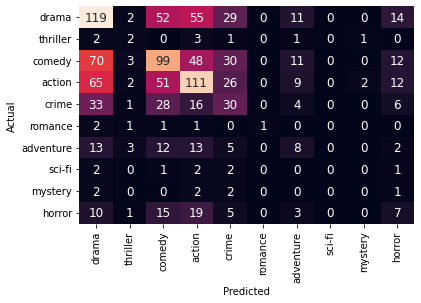

In [22]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import seaborn as sn
import numpy as np

all_labels = ['drama', 'thriller', 'comedy', 'action', 'crime', 'romance', 'adventure', 'sci-fi', 'mystery', 'horror']

def plotConfusionMatrix(labels_test, labels_predicted_best_test):
  x = confusion_matrix(labels_test, labels_predicted_best_test, labels=all_labels)
  plot = sn.heatmap(np.array(x), 
              annot=True, 
              annot_kws={"size": 12}, 
              fmt='g', 
              cbar=False,
              xticklabels=all_labels, 
              yticklabels=all_labels
            )
  plot.set(xlabel='Predicted', ylabel='Actual')
  return plot

plotConfusionMatrix(labels_test, labels_predicted_best_test)

In [17]:
from collections import Counter
counter_test = Counter(labels_test)
conter_predict = Counter(labels_predicted_best_test)
counter_test,conter_predict

(Counter({'comedy': 273,
          'drama': 282,
          'crime': 118,
          'action': 278,
          'horror': 60,
          'adventure': 56,
          'sci-fi': 8,
          'romance': 6,
          'thriller': 10,
          'mystery': 7}),
 Counter({'action': 270,
          'drama': 318,
          'comedy': 259,
          'adventure': 47,
          'crime': 130,
          'horror': 55,
          'thriller': 15,
          'romance': 1,
          'mystery': 3}))